In [2]:
import geopandas as gpd
import csv
import pandas as pd

data = []
with open("/Users/rachelralph/Desktop/pima-diabetes.csv", newline = "")as csvfile:
        pima_data = csv.reader(csvfile, delimiter=',')
        for row in pima_data:
            data.append(row)

In [4]:
df = pd.DataFrame(data)
df.head(10)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0,0.232,54,1


In [5]:
train_data = df.sample(frac = 0.8, random_state = 42)
test_data = df.drop(train_data.index)

In [6]:
train_labels = train_data.pop(8)
test_labels = test_data.pop(8)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

decision_tree_model = DecisionTreeClassifier(random_state = 42, min_samples_leaf = 10)
random_forest_model = RandomForestClassifier(random_state = 42, min_samples_leaf = 10)
decision_tree_model.fit(train_data, train_labels)
random_forest_model.fit(train_data, train_labels)

RandomForestClassifier(min_samples_leaf=10, random_state=42)

In [8]:
from sklearn.metrics import accuracy_score

y_pred_1 = decision_tree_model.predict(test_data)
accuracy_1 = accuracy_score(test_labels, y_pred_1)

y_pred_2 = random_forest_model.predict(test_data)
accuracy_2 = accuracy_score(test_labels, y_pred_2)

print(accuracy_1)
print(accuracy_2)

0.7597402597402597
0.7142857142857143


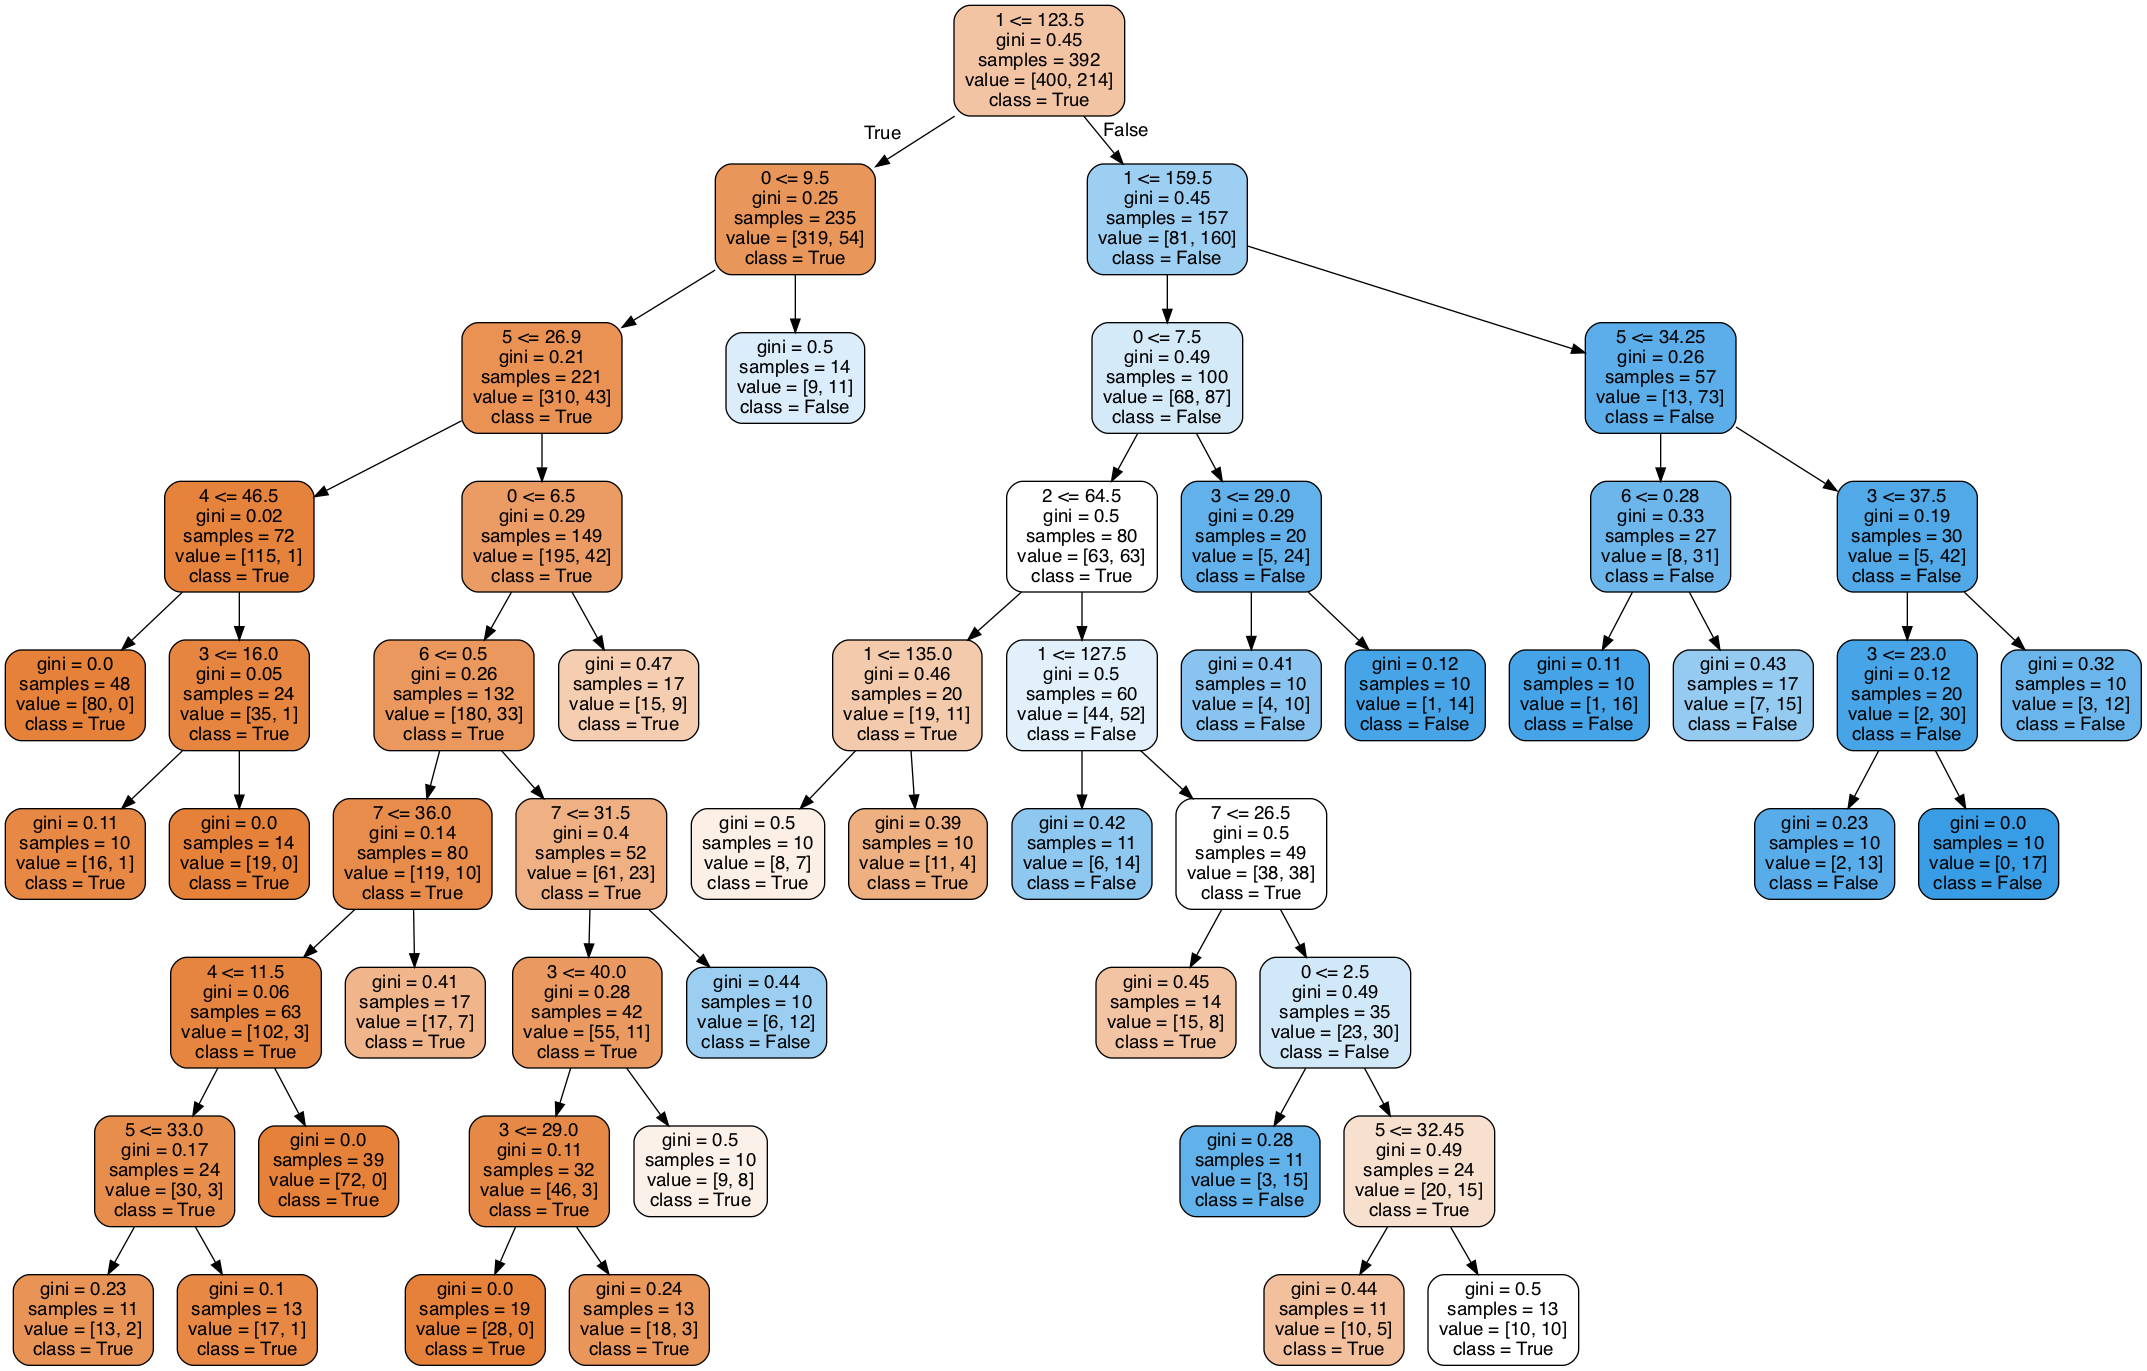

In [12]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import check_call

estimator = random_forest_model.estimators_[5]

export_graphviz(estimator, out_file = "tree.dot", feature_names = [0,1,2,3,4,5,6,7], class_names = ["True", "False"], rounded = True, proportion = False, precision = 2, filled = True)
ll

check_call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi = 600'])


Image(filename = 'tree.png')